In [2]:
import pandas as pd

nhl_games= pd.read_csv("/Users/joejohns/Downloads/Kaggle_data/game.csv")

In [3]:
nhl_games.columns

Index(['game_id', 'season', 'type', 'date_time_GMT', 'away_team_id',
       'home_team_id', 'away_goals', 'home_goals', 'outcome',
       'home_rink_side_start', 'venue', 'venue_link', 'venue_time_zone_id',
       'venue_time_zone_offset', 'venue_time_zone_tz'],
      dtype='object')

In [42]:
nhl_20162017 = nhl_games.loc[(nhl_games['season'] == 20162017)&(nhl_20162017['type'] == 'R') , ['game_id', 'season', 'type', 'date_time_GMT', 'away_team_id',
       'home_team_id', 'away_goals', 'home_goals', 'outcome']]

In [43]:
nhl_20162017['date_time_GMT'] = pd.to_datetime(nhl_20162017['date_time_GMT'])

In [44]:
nhl_20162017.loc[0,'date_time_GMT']

nhl_20162017.sort_values(by='date_time_GMT', inplace = True) 

In [45]:

#nhl_team.loc[(nhl_mp["settled_in"] == 'tbc'), :]
nhl_20162017.head(6)

,game_id,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome
2393,2016020001,20162017,R,2016-10-12 23:00:00+00:00,10,9,4,5,home win OT
1721,2016020002,20162017,R,2016-10-13 00:00:00+00:00,19,16,5,2,away win REG
1893,2016020003,20162017,R,2016-10-13 02:00:00+00:00,20,22,4,7,home win REG
1843,2016020004,20162017,R,2016-10-13 02:30:00+00:00,26,28,1,2,home win REG
3040,2016020008,20162017,R,2016-10-13 23:00:00+00:00,6,29,6,3,away win REG
1668,2016020005,20162017,R,2016-10-13 23:00:00+00:00,8,7,4,1,away win REG


In [27]:
team_info = pd.read_csv("/Users/joejohns/Downloads/Kaggle_data/team_info.csv" )

In [29]:
team_info.dtypes

team_id          int64
franchiseId      int64
shortName       object
teamName        object
abbreviation    object
link            object
dtype: object

team_info.head()

In [54]:
team_info.head()

,team_id,franchiseId,shortName,teamName,abbreviation,link
0,1,23,New Jersey,Devils,NJD,/api/v1/teams/1
1,4,16,Philadelphia,Flyers,PHI,/api/v1/teams/4
2,26,14,Los Angeles,Kings,LAK,/api/v1/teams/26
3,14,31,Tampa Bay,Lightning,TBL,/api/v1/teams/14
4,6,6,Boston,Bruins,BOS,/api/v1/teams/6


In [32]:
team_info.loc[team_info['team_id'] == 1, 'abbreviation'][0]

'NJD'

In [77]:
def map_names(team_id):
    index = team_info.loc[team_info['team_id'] == team_id, 'abbreviation'].index[0]
    return team_info.loc[team_info['team_id'] == team_id, 'abbreviation'][index]


In [79]:
map_names(10)

'TOR'

In [71]:
team_info.loc[:,['team_id', 'abbreviation']]

,team_id,abbreviation
0,1,NJD
1,4,PHI
2,26,LAK
3,14,TBL
4,6,BOS
5,3,NYR
6,5,PIT
7,17,DET
8,28,SJS
9,18,NSH


In [80]:
nhl_20162017['away_team_id'] = nhl_20162017['away_team_id'].map(map_names) 

In [81]:
nhl_20162017['home_team_id'] = nhl_20162017['home_team_id'].map(map_names)

In [82]:
nhl_20162017

,game_id,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome
2393,2016020001,20162017,R,2016-10-12 23:00:00+00:00,TOR,OTT,4,5,home win OT
1721,2016020002,20162017,R,2016-10-13 00:00:00+00:00,STL,CHI,5,2,away win REG
1893,2016020003,20162017,R,2016-10-13 02:00:00+00:00,CGY,EDM,4,7,home win REG
1843,2016020004,20162017,R,2016-10-13 02:30:00+00:00,LAK,SJS,1,2,home win REG
3040,2016020008,20162017,R,2016-10-13 23:00:00+00:00,BOS,CBJ,6,3,away win REG
...,...,...,...,...,...,...,...,...,...
2966,2016021227,20162017,R,2017-04-09 23:00:00+00:00,CAR,PHI,4,3,away win OT
412,2016021226,20162017,R,2017-04-09 23:00:00+00:00,PIT,NYR,2,3,home win REG
1786,2016021228,20162017,R,2017-04-09 23:00:00+00:00,FLA,WSH,2,0,away win REG
1907,2016021229,20162017,R,2017-04-10 00:30:00+00:00,LAK,ANA,3,4,home win OT


In [89]:
nhl_20162017 = nhl_20162017.reset_index(drop = True)

In [115]:
df = nhl_20162017.copy()
df

,game_id,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome
0,2016020001,20162017,R,2016-10-12 23:00:00+00:00,TOR,OTT,4,5,home win OT
1,2016020002,20162017,R,2016-10-13 00:00:00+00:00,STL,CHI,5,2,away win REG
2,2016020003,20162017,R,2016-10-13 02:00:00+00:00,CGY,EDM,4,7,home win REG
3,2016020004,20162017,R,2016-10-13 02:30:00+00:00,LAK,SJS,1,2,home win REG
4,2016020008,20162017,R,2016-10-13 23:00:00+00:00,BOS,CBJ,6,3,away win REG
...,...,...,...,...,...,...,...,...,...
1225,2016021227,20162017,R,2017-04-09 23:00:00+00:00,CAR,PHI,4,3,away win OT
1226,2016021226,20162017,R,2017-04-09 23:00:00+00:00,PIT,NYR,2,3,home win REG
1227,2016021228,20162017,R,2017-04-09 23:00:00+00:00,FLA,WSH,2,0,away win REG
1228,2016021229,20162017,R,2017-04-10 00:30:00+00:00,LAK,ANA,3,4,home win OT


In [96]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge

In [117]:
df['goal_difference'] = df['home_goals'] - df['away_goals']

In [118]:
# create new variables to show home team win or loss result
df['home_win'] = np.where(df['goal_difference'] > 0, 1, 0)
df['home_loss'] = np.where(df['goal_difference'] < 0, 1, 0)

In [119]:
df.head(6)

,game_id,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,goal_difference,home_win,home_loss
0,2016020001,20162017,R,2016-10-12 23:00:00+00:00,TOR,OTT,4,5,home win OT,1,1,0
1,2016020002,20162017,R,2016-10-13 00:00:00+00:00,STL,CHI,5,2,away win REG,-3,0,1
2,2016020003,20162017,R,2016-10-13 02:00:00+00:00,CGY,EDM,4,7,home win REG,3,1,0
3,2016020004,20162017,R,2016-10-13 02:30:00+00:00,LAK,SJS,1,2,home win REG,1,1,0
4,2016020008,20162017,R,2016-10-13 23:00:00+00:00,BOS,CBJ,6,3,away win REG,-3,0,1
5,2016020005,20162017,R,2016-10-13 23:00:00+00:00,MTL,BUF,4,1,away win REG,-3,0,1


In [120]:
df_visitor = pd.get_dummies(df['away_team_id'], dtype=np.int64)
df_home = pd.get_dummies(df['home_team_id'], dtype=np.int64)

In [121]:
df_visitor.head(3)

,ANA,ARI,BOS,BUF,CAR,CBJ,CGY,CHI,COL,DAL,...,OTT,PHI,PIT,SJS,STL,TBL,TOR,VAN,WPG,WSH
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
df_model = df_home.sub(df_visitor) 
df_model['goal_difference'] = df['goal_difference']

In [153]:
df_model

,ANA,ARI,BOS,BUF,CAR,CBJ,CGY,CHI,COL,DAL,...,PHI,PIT,SJS,STL,TBL,TOR,VAN,WPG,WSH,goal_difference
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,-1,0,0,0,0,0,-3
2,0,0,0,0,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,-1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,0,0,0,0,-1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-1
1226,0,0,0,0,0,0,0,0,0,0,...,0,-1,0,0,0,0,0,0,0,1
1227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-2
1228,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [154]:
df_train = df_model.iloc[:600, :].copy()
df_test = df_model.iloc[600:, :].copy()

In [155]:

lr = Ridge(alpha=0.001) 
X = df_train.drop(['goal_difference'], axis=1)
y = df_train['goal_difference']

lr.fit(X, y)

Ridge(alpha=0.001)

In [156]:
df_ratings = pd.DataFrame(data={'team': X.columns, 'rating': lr.coef_})
df_ratings

,team,rating
0,ANA,0.053048
1,ARI,-0.989386
2,BOS,0.090656
3,BUF,-0.427667
4,CAR,-0.008923
5,CBJ,1.212624
6,CGY,-0.165199
7,CHI,0.171998
8,COL,-1.266466
9,DAL,-0.532483


In [ ]:
##test this on rest of this season WITHOUT updating the rankings as we go!

In [157]:
X_test = df_test.drop(['goal_difference'], axis=1)
y_test = df_test['goal_difference']


y_pred = lr.predict(X_test)

In [158]:
df_test['goal_difference']


600     3
601     4
602     1
603     1
604     2
       ..
1225   -1
1226    1
1227   -2
1228    1
1229    3
Name: goal_difference, Length: 630, dtype: int64

In [159]:
def make_win(y):
    if y >0:
        return 1
    if y< 0:
        return 0

In [160]:


y_test_win = pd.Series(y_test).map(make_win)

In [161]:
y_pred_win = pd.Series(y_pred).map(make_win)

In [164]:
y_pred_win.value_counts()

1    441
0    189
dtype: int64

In [162]:
y_test_win.value_counts()

1    342
0    288
Name: goal_difference, dtype: int64

In [168]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [171]:

def evaluate_binary_classification(model_name, y_test, y_pred, y_proba=None):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    #try:
    if y_proba != None:
        rocauc_score = roc_auc_score(y_test, y_proba)
    else:
        rocauc_score = "no roc"
    #except: 
    #    pass     
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)
    plt.tight_layout()
    plt.title(f'{model_name}', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    print("accuracy: ", accuracy)
    print("precision: ", precision)
    print("recall: ", recall)
    print("f1 score: ", f1)
    print("rocauc: ", rocauc_score)
    print(cm)
    #return accuracy, precision, recall, f1, rocauc_score

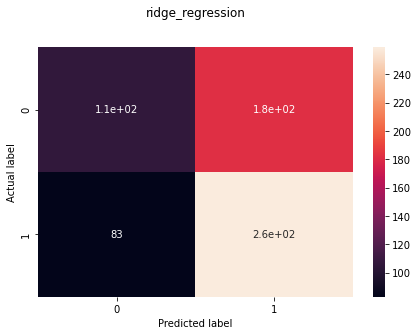

accuracy:  0.5793650793650794
precision:  0.5873015873015873
recall:  0.7573099415204678
f1 score:  0.661558109833972
rocauc:  no roc
[[106 182]
 [ 83 259]]


In [172]:
evaluate_binary_classification('ridge_regression', y_test_win, y_pred_win)

In [173]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score

def evaluate_regression(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("mae", mae)
    print("mse", mse)
    print('r2', r2)

In [174]:
evaluate_regression(y_test, y_pred)

mae 1.9137773622272165
mse 5.305807171452987
r2 0.030844151607030246


In [ ]:
##off by 2 goals on avg?? that's really bad

In [192]:
len(y_test_win)

630

In [196]:
pred_res= pd.DataFrame({ 'pred_win': list(y_pred_win), 'actual_win': list(y_test_win), 'pred_GD': y_pred, 'actual_GD': y_test })

In [197]:
pred_res.iloc[:20,:]

,pred_win,actual_win,pred_GD,actual_GD
600,1,1,1.110372,3
601,1,1,1.202956,4
602,1,1,0.257595,1
603,1,1,1.759943,1
604,1,1,0.006306,2
605,1,1,0.554878,3
606,0,0,-0.482523,-1
607,1,0,0.290546,-3
608,1,0,0.455110,-3
609,1,1,0.233514,2
